## Run these cells only if you're on Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
! git clone https://github.com/aryamaansaha/low-light-mosquito-detection.git

Cloning into 'low-light-mosquito-detection'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 52 (delta 5), reused 21 (delta 4), pack-reused 26 (from 1)
Receiving objects: 100% (52/52), 59.10 MiB | 44.76 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
!gdown https://drive.google.com/file/d/1ZLz5ppWdR5V4ru_YHvu29qZVqy_sdM7F/view?usp=sharing --fuzzy

Downloading...
From (original): https://drive.google.com/uc?id=1ZLz5ppWdR5V4ru_YHvu29qZVqy_sdM7F
From (redirected): https://drive.google.com/uc?id=1ZLz5ppWdR5V4ru_YHvu29qZVqy_sdM7F&confirm=t&uuid=6a49c80e-88e6-4352-b082-f0c6592ba697
To: /content/il_dataset.zip
100% 6.17G/6.17G [00:39<00:00, 157MB/s]


In [4]:
%mkdir datasets

In [5]:
!unzip -q il_dataset.zip -d datasets/

In [6]:
%cd ./low-light-mosquito-detection/SSD

/content/low-light-mosquito-detection/SSD


In [7]:
%pwd

'/content/low-light-mosquito-detection/SSD'

In [8]:
from dataset import MosquitoDataset
from model import build_SSD
from train import train
from utils import plot_losses, plot_predictions, get_metrics

import torch
from torch.utils.data import DataLoader
import os


# Simple Dataset

In [ ]:
datafolder = "simple_dataset"
batch_size = 8
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train", img_size=300)
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val", img_size=300)
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test", img_size=300)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [ ]:
model = build_SSD(num_classes=7) # 6 mosquito classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
N_epochs = 10
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 142/142 [01:34<00:00,  1.51it/s]


Best model saved with val loss: 4.7637
Epoch [1/10] | Train Loss: 5.6351 | Val Loss: 4.7637 | Time: 10 min 10 s


100%|██████████| 142/142 [01:49<00:00,  1.30it/s]


Best model saved with val loss: 3.9390
Epoch [2/10] | Train Loss: 4.1348 | Val Loss: 3.9390 | Time: 11 min 56 s


100%|██████████| 142/142 [01:48<00:00,  1.31it/s]


Best model saved with val loss: 3.5495
Epoch [3/10] | Train Loss: 3.6053 | Val Loss: 3.5495 | Time: 12 min 22 s


100%|██████████| 142/142 [01:35<00:00,  1.49it/s]


Best model saved with val loss: 3.1384
Epoch [4/10] | Train Loss: 3.0085 | Val Loss: 3.1384 | Time: 12 min 23 s


100%|██████████| 142/142 [01:19<00:00,  1.78it/s]


Best model saved with val loss: 3.0973
Epoch [5/10] | Train Loss: 2.8710 | Val Loss: 3.0973 | Time: 11 min 55 s


100%|██████████| 142/142 [01:17<00:00,  1.82it/s]


Best model saved with val loss: 3.0598
Epoch [6/10] | Train Loss: 2.7956 | Val Loss: 3.0598 | Time: 10 min 21 s


100%|██████████| 142/142 [01:45<00:00,  1.34it/s]


Best model saved with val loss: 3.0212
Epoch [7/10] | Train Loss: 2.6747 | Val Loss: 3.0212 | Time: 10 min 15 s


100%|██████████| 142/142 [01:15<00:00,  1.87it/s]


Best model saved with val loss: 3.0176
Epoch [8/10] | Train Loss: 2.6581 | Val Loss: 3.0176 | Time: 11 min 50 s


100%|██████████| 142/142 [01:10<00:00,  2.02it/s]


Best model saved with val loss: 3.0134
Epoch [9/10] | Train Loss: 2.6502 | Val Loss: 3.0134 | Time: 9 min 12 s


100%|██████████| 142/142 [01:09<00:00,  2.04it/s]


Best model saved with val loss: 3.0110
Epoch [10/10] | Train Loss: 2.6321 | Val Loss: 3.0110 | Time: 8 min 36 s


Loss plot saved to plots/simple_dataset/


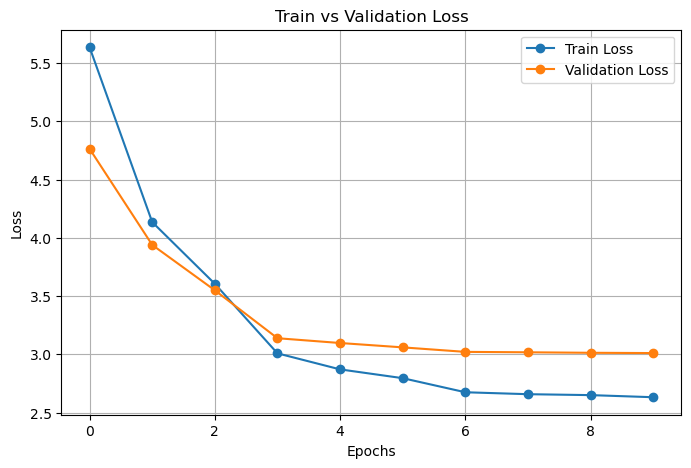

In [ ]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)


In [ ]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_7120\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "best

<All keys matched successfully>

Plot saved at: plots/simple_dataset/predictions_vs_ground_truth.png


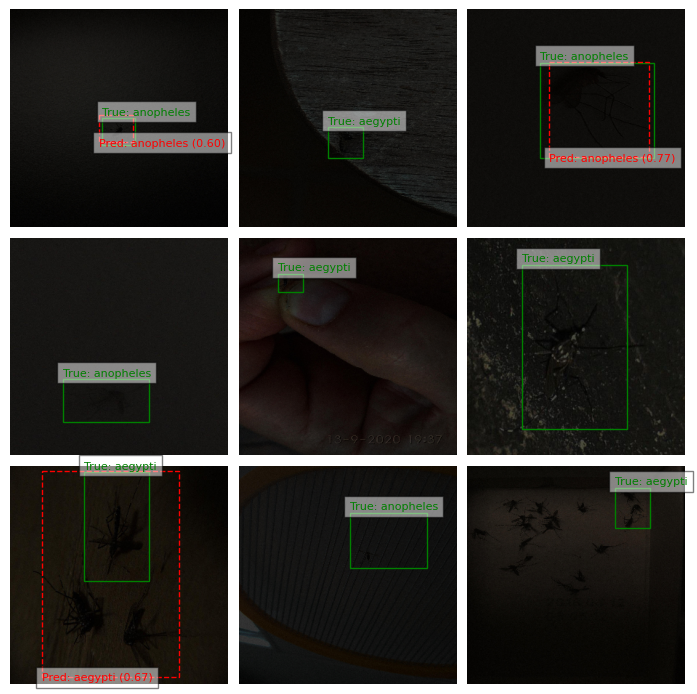

In [ ]:
plot_predictions(model, testloader, device, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)


In [ ]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 66/66 [00:42<00:00,  1.56it/s]

F1 Score: 0.5425, mAP: 0.7257, Composite mAP-F1: 0.6341, Precision: 0.6526, Recall: 0.4642


In [ ]:
datafolder = "aug_il_dataset"
batch_size = 8
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train", img_size=300)
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val", img_size=300)
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test", img_size=300)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Old model run

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = build_SSD(num_classes=7)

In [ ]:
model.load_state_dict(torch.load('../../LLD/ssd_models/ssd_best_model.pth'))

C:\Users\aryam\AppData\Local\Temp\ipykernel_7120\3684949361.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('../../LLD/ssd_models/ssd_be

<All keys matched successfully>

In [ ]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 66/66 [00:36<00:00,  1.82it/s]

F1 Score: 0.7559, mAP: 0.7986, Composite mAP-F1: 0.7772, Precision: 0.7618, Recall: 0.7500


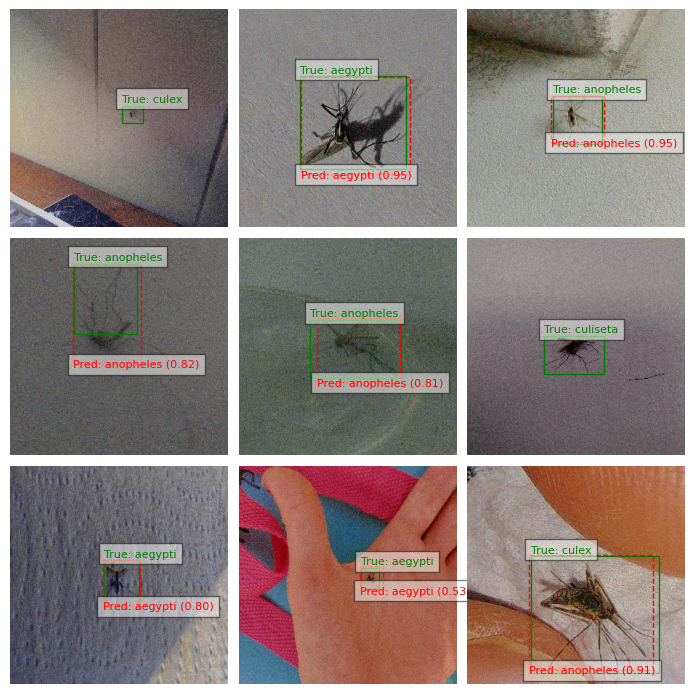

In [ ]:
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=None)

# Il Dataset

In [9]:
datafolder = "il_dataset"
batch_size = 8
images_dir = f"../../datasets/{datafolder}/images"
labels_dir = f"../../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train", img_size=300)
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val", img_size=300)
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test", img_size=300)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [10]:
model = build_SSD(num_classes=7) # 6 mosquito classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 198MB/s]


In [11]:
N_epochs = 10
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 142/142 [00:48<00:00,  2.93it/s]


Best model saved with val loss: 3.8573
Epoch [1/10] | Train Loss: 5.0965 | Val Loss: 3.8573 | Time: 5 min 34 s


100%|██████████| 142/142 [00:48<00:00,  2.96it/s]


Best model saved with val loss: 3.3439
Epoch [2/10] | Train Loss: 3.5265 | Val Loss: 3.3439 | Time: 5 min 29 s


100%|██████████| 142/142 [00:47<00:00,  2.98it/s]


Best model saved with val loss: 3.3034
Epoch [3/10] | Train Loss: 3.0347 | Val Loss: 3.3034 | Time: 5 min 29 s


100%|██████████| 142/142 [00:48<00:00,  2.94it/s]


Best model saved with val loss: 2.7412
Epoch [4/10] | Train Loss: 2.2811 | Val Loss: 2.7412 | Time: 5 min 29 s


100%|██████████| 142/142 [00:47<00:00,  2.98it/s]


Best model saved with val loss: 2.7009
Epoch [5/10] | Train Loss: 2.1048 | Val Loss: 2.7009 | Time: 5 min 27 s


100%|██████████| 142/142 [00:47<00:00,  2.99it/s]


Best model saved with val loss: 2.6895
Epoch [6/10] | Train Loss: 1.9902 | Val Loss: 2.6895 | Time: 5 min 27 s


100%|██████████| 142/142 [00:48<00:00,  2.95it/s]


Best model saved with val loss: 2.6672
Epoch [7/10] | Train Loss: 1.8579 | Val Loss: 2.6672 | Time: 5 min 28 s


100%|██████████| 142/142 [00:48<00:00,  2.91it/s]


Epoch [8/10] | Train Loss: 1.8320 | Val Loss: 2.6713 | Time: 5 min 28 s


100%|██████████| 142/142 [00:47<00:00,  2.99it/s]


Epoch [9/10] | Train Loss: 1.8181 | Val Loss: 2.6735 | Time: 5 min 25 s


100%|██████████| 142/142 [00:47<00:00,  2.99it/s]

Epoch [10/10] | Train Loss: 1.7970 | Val Loss: 2.6747 | Time: 5 min 26 s


Loss plot saved to plots/il_dataset/


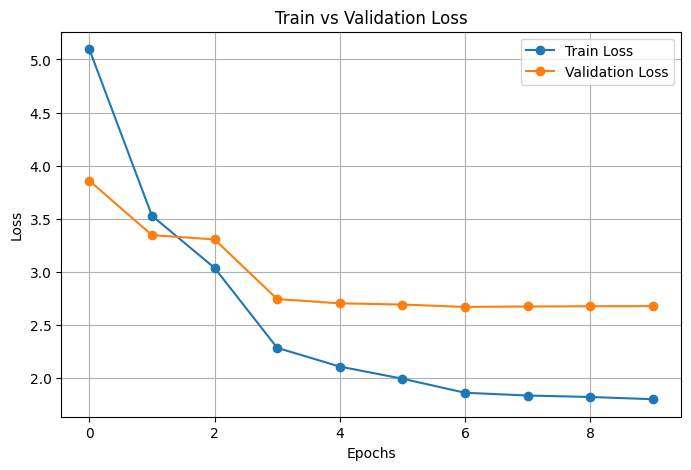

In [12]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)

In [13]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

<ipython-input-13-e77cf7fd5037>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))


<All keys matched successfully>

Plot saved at: plots/il_dataset/predictions_vs_ground_truth.png


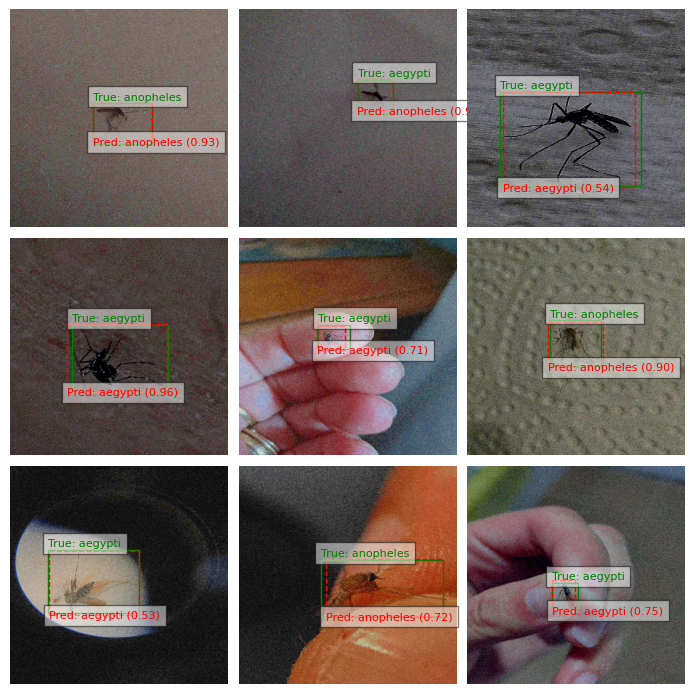

In [14]:
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)


In [15]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 66/66 [00:24<00:00,  2.75it/s]

F1 Score: 0.7755, mAP: 0.8045, Composite mAP-F1: 0.7900, Precision: 0.7490, Recall: 0.8040


## Run these cells only if you're on google colab

In [16]:
%pwd

'/content/low-light-mosquito-detection/SSD'

In [17]:
%cd ../../

/content


In [18]:
!cp -r low-light-mosquito-detection/SSD/plots/il_dataset drive/MyDrive/MosquitoDetection/low-light-mosquito-detection/SSD/plots/

In [19]:
!cp -r low-light-mosquito-detection/SSD/models/il_dataset drive/MyDrive/MosquitoDetection/low-light-mosquito-detection/SSD/models/

In [21]:
os.listdir("drive/MyDrive/MosquitoDetection/low-light-mosquito-detection/SSD/models/il_dataset")

['model_epoch_1.pth',
 'best_model.pth',
 'model_epoch_2.pth',
 'model_epoch_3.pth',
 'model_epoch_4.pth',
 'model_epoch_5.pth',
 'model_epoch_6.pth',
 'model_epoch_7.pth',
 'model_epoch_8.pth',
 'model_epoch_9.pth',
 'model_epoch_10.pth']